# Importación de librerías

In [55]:
import pandas as pd
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from deep_translator import GoogleTranslator
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import itertools
from nltk import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import numpy as np


# Dataset

In [4]:
data = pd.read_csv('data/challenge - dataset.csv')

In [7]:
data.iloc[4]['about']

'"Fabricación y distribución de complementos alimenticios, cosméticos y suplementos para el bienestar y la salud de todos. Especializada en silicio orgánico.'

# Exploratory Analysis

In [8]:
data.head()

,id,nif_code,web_site,linkedin_url,about,Label,website_url,blog_url,angellist_url,twitter_url,...,keywords,num_suborganizations,short_description,specialities_x,location_x,specialities_y,location_y,specialities,name,location
0,5b133284a6da98dccdde5f03,B53876694,palomabarcelo.com,http://www.linkedin.com/company/palomabarcelo,""" High quality and perfection are the result o...",0,http://www.palomabarcelo.com,NaN,NaN,NaN,...,"['diseno', 'calzado', 'moda', 'lujo']",0,""" High quality and perfection are the result o...","Diseño, Calzado, Moda, and Lujo","Elche, Alicante",NaN,NaN,NaN,Paloma Barcelo,NaN
1,556d34fd7369641226dab000,B37020187,beher.com,http://www.linkedin.com/company/beher-switzerland,"""BEST HAM IN THE WORLD""​- IFFA International F...",0,http://www.beher.com,NaN,NaN,NaN,...,"['acornfed ham', 'jamon iberico de bellota', '...",0,"""BEST HAM IN THE WORLD""- IFFA International Fr...","Jamón Ibérico de Bellota, Productos Ibéricos, ...","Guijuelo, Salamanca",NaN,NaN,NaN,BEHER™,NaN
2,5e57ea61d5bd4a000176bd7c,B93643716,aguacateradelsur.com,http://www.linkedin.com/company/aguacatera,"""El mundo necesita gente como La Aguacatera, q...",0,http://www.aguacateradelsur.com,NaN,NaN,NaN,...,['avocados'],0,"""El mundo necesita gente como La Aguacatera, q...",Avocados,"Vélez-Málaga, Andalucía",NaN,NaN,NaN,Compañía Aguacatera del Sur,NaN
3,5e581dba9064ba0001ceb925,A48980122,altegui.com,http://www.linkedin.com/company/dux-inversores,"""El valor del trabajo bien hecho""​\n\nSomos un...",0,http://www.duxinversores.com,NaN,NaN,NaN,...,"['asset management', 'ciclo economico y sector...",0,"""El valor del trabajo bien hecho""\n\nSomos un ...","Asset Management, Ciclo Económico y Sectores, ...","Madrid, Comunidad de Madrid",NaN,NaN,NaN,DUX INVERSORES,NaN
4,5e55a840831f070001de01d2,B74215559,siliciumg5.com,http://www.linkedin.com/company/siliciumlab,"""Fabricación y distribución de complementos al...",1,http://www.siliciumg5.com,NaN,NaN,https://twitter.com/SiliciumEspagne,...,"['rosa mosqueta', 'g7 defender', 'silicium g5'...",0,"""Fabricación y distribución de complementos al...",NaN,NaN,NaN,NaN,"Silicio Orgánico , silicium, Silica, silicium ...",SILICIUM ESPAÑA LABORATORIOS SL,"Reus, Cataluña / Catalunya"


In [9]:
data['Label'] = data['Label'].astype('str')

In [10]:
# Numerical variables

data.describe()

,blog_url,alexa_ranking,linkedin_uid,num_suborganizations
count,0.0,268.000000,2.867000e+03,2912.000000
mean,NaN,299451.589552,2.061993e+07,0.020604
std,NaN,184015.515694,2.378771e+07,0.857958
min,NaN,5.000000,2.311000e+03,0.000000
25%,NaN,149431.000000,2.879494e+06,0.000000
50%,NaN,290733.000000,1.077729e+07,0.000000
75%,NaN,444141.750000,3.320568e+07,0.000000
max,NaN,792401.000000,8.670351e+07,46.000000


In [11]:
data.columns

Index(['id', 'nif_code', 'web_site', 'linkedin_url', 'about', 'Label',
       'website_url', 'blog_url', 'angellist_url', 'twitter_url',
       'facebook_url', 'primary_phone', 'languages', 'alexa_ranking', 'phone',
       'linkedin_uid', 'primary_domain', 'persona_counts', 'keywords',
       'num_suborganizations', 'short_description', 'specialities_x',
       'location_x', 'specialities_y', 'location_y', 'specialities', 'name',
       'location'],
      dtype='object')

In [12]:
# Check if columns "about" and "short_description" are the same

# I will take column "about" instead of "short_description"

data['isEquel_aboout_short_description'] = False

data.loc[data.about == data.short_description,'isEquel_aboout_short_description'] = True

data.isEquel_aboout_short_description.value_counts()

isEquel_aboout_short_description
True     2230
False     682
Name: count, dtype: int64

In [13]:
# Check NULL values in variables

data.isnull().sum()

id                                     0
nif_code                               0
web_site                               0
linkedin_url                           0
about                                  0
Label                                  0
website_url                            4
blog_url                            2912
angellist_url                       2891
twitter_url                         1906
facebook_url                        1649
primary_phone                          0
languages                              0
alexa_ranking                       2644
phone                                731
linkedin_uid                          45
primary_domain                         4
persona_counts                         0
keywords                               0
num_suborganizations                   0
short_description                     29
specialities_x                      1070
location_x                           573
specialities_y                      2832
location_y      

In [14]:
#Check if there are duplicates

data['id'].duplicated().sum()

85

c:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


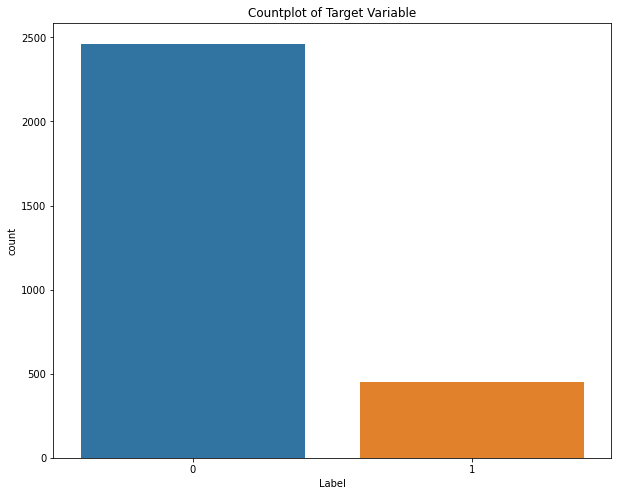

In [15]:
# Target variable is unbalanced. For this reason, balancing methods shlud be used in training step.

plt.figure(figsize = (10,8))
sns.countplot(data.Label)
plt.title('Countplot of Target Variable')
plt.show()

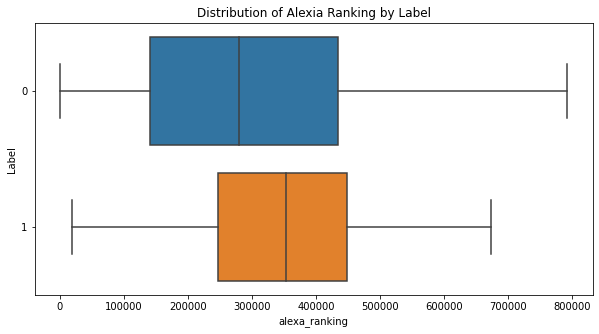

In [16]:
# Apparently there is a correlation, but I will not take this variable since there are many null values (2644).

plt.figure(figsize = (10,5))

sns.boxplot(data = data, x='alexa_ranking', y = 'Label')
plt.title('Distribution of Alexia Ranking by Label')
plt.show()

# Preprocessing

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words_en = set(stopwords.words('english'))
stop_words_es = set(stopwords.words('spanish'))

lemmatizer = WordNetLemmatizer()


def translate_to_english(text:str):

    """ This function translates a text into English"""

    translated = GoogleTranslator(source='auto', target='en').translate(text)

    return translated


def get_wordnet_pos(tag):

    """Map POS tag to WordNet POS tag"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def preprocess_text(text : str):
    """
    This function receives a text and 
    eliminates characters, tokenizes and 
    lemmatizes.
    """

    # Traslate text into english

    text_en = translate_to_english(text)

    # Delete characters

    text_alpha_only = re.sub(r'[^a-zA-ZñÑáéíóúÁÉÍÓÚ]', ' ', text_en)

    # Tokenization
    tokens = word_tokenize(text_alpha_only)
    tagged_tokens = nltk.pos_tag(tokens)
    
    lemmatized_tokens = [lemmatizer.lemmatize(word.lower(), get_wordnet_pos(tag)) for word, tag in tagged_tokens if ((get_wordnet_pos(tag) == wordnet.NOUN) | (get_wordnet_pos(tag) == wordnet.ADJ)) ]

    return lemmatized_tokens


def filter_words(text,filtered_words):

    """ This fuction filters the words in
    a text using a list of words"""

    return [token for token in text if token in filtered_words]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arrua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arrua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arrua\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# First I process all the texts in "about" column for each company

all_words = []
i = 0
for text in data['about']:
    i+=1
    print(i,end='\r')
    text_processed = preprocess_text(text)
    all_words.append(text_processed)

In [21]:
# Calculate he frequency of each word and filter those wit count less than 3

word_counts = Counter(list(itertools.chain.from_iterable(all_words)))

filtered_words = {word for word, count in word_counts.items() if count > 3 and word not in stop_words_en and word not in stop_words_es and len(word)>2}

# Filter the words of the tokenized description

filtered_tokens = [filter_words(token,filtered_words) for token in all_words]


In [27]:
# Add variable 

data['about_token'] = filtered_tokens

In [28]:
data.head()

,id,nif_code,web_site,linkedin_url,about,Label,website_url,blog_url,angellist_url,twitter_url,...,short_description,specialities_x,location_x,specialities_y,location_y,specialities,name,location,isEquel_aboout_short_description,about_token
0,5b133284a6da98dccdde5f03,B53876694,palomabarcelo.com,http://www.linkedin.com/company/palomabarcelo,""" High quality and perfection are the result o...",0,http://www.palomabarcelo.com,NaN,NaN,NaN,...,""" High quality and perfection are the result o...","Diseño, Calzado, Moda, and Lujo","Elche, Alicante",NaN,NaN,NaN,Paloma Barcelo,NaN,True,"[high, quality, perfection, result, hundred, s..."
1,556d34fd7369641226dab000,B37020187,beher.com,http://www.linkedin.com/company/beher-switzerland,"""BEST HAM IN THE WORLD""​- IFFA International F...",0,http://www.beher.com,NaN,NaN,NaN,...,"""BEST HAM IN THE WORLD""- IFFA International Fr...","Jamón Ibérico de Bellota, Productos Ibéricos, ...","Guijuelo, Salamanca",NaN,NaN,NaN,BEHER™,NaN,False,"[best, ham, world, international, frankfurt, t..."
2,5e57ea61d5bd4a000176bd7c,B93643716,aguacateradelsur.com,http://www.linkedin.com/company/aguacatera,"""El mundo necesita gente como La Aguacatera, q...",0,http://www.aguacateradelsur.com,NaN,NaN,NaN,...,"""El mundo necesita gente como La Aguacatera, q...",Avocados,"Vélez-Málaga, Andalucía",NaN,NaN,NaN,Compañía Aguacatera del Sur,NaN,False,"[world, people]"
3,5e581dba9064ba0001ceb925,A48980122,altegui.com,http://www.linkedin.com/company/dux-inversores,"""El valor del trabajo bien hecho""​\n\nSomos un...",0,http://www.duxinversores.com,NaN,NaN,NaN,...,"""El valor del trabajo bien hecho""\n\nSomos un ...","Asset Management, Ciclo Económico y Sectores, ...","Madrid, Comunidad de Madrid",NaN,NaN,NaN,DUX INVERSORES,NaN,False,"[value, job, independent, financial, group, we..."
4,5e55a840831f070001de01d2,B74215559,siliciumg5.com,http://www.linkedin.com/company/siliciumlab,"""Fabricación y distribución de complementos al...",1,http://www.siliciumg5.com,NaN,NaN,https://twitter.com/SiliciumEspagne,...,"""Fabricación y distribución de complementos al...",NaN,NaN,NaN,NaN,"Silicio Orgánico , silicium, Silica, silicium ...",SILICIUM ESPAÑA LABORATORIOS SL,"Reus, Cataluña / Catalunya",True,"[manufacturing, distribution, food, supplement..."


In [29]:
# Transform data into vectors

data['about_token'] = data['about_token'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['about_token'])

# Get DataFrame to be used in Modeling

data_model = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [251]:
# bag_of_words.to_parquet('data_bag.parquet',compression = 'gzip')

In [2]:
# bag_of_words = pd.read_parquet('data_bag.parquet')

In [30]:
data_model = pd.concat([data[['Label']],data_model],axis = 1)
data_model.head()

,Label,abc,abetos,ability,able,abrasive,absolute,absorption,acacia,academic,...,zero,zeta,zeulab,zinc,zinkia,zone,zown,álava,ángel,ávila
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploratory analysis - Bag of Words

In [31]:
def get_word_counter(data:pd.DataFrame):

    """ This function returns a Counter object
    that contains the frequency of each word"""

    word_counter = Counter()

    for sublist in data.about_token.values.tolist():
        words = sublist.split()  
        word_counter.update(words) 
    
    return word_counter

In [32]:
def plot_bar_countwords(word_counter, num_words,title):

    """This function plots a barplot that 
      shows the frequency of each word contained
        in the tokenized variable  """

    
    words, count = zip(*word_counter.most_common(num_words))

    plt.figure(figsize=(10, 30))
    plt.barh(words, count, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Count of Words ' + title)
    plt.gca().invert_yaxis()  
    plt.show()

In [33]:
def plot_wordcoud(word_counter, title:str):

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Eliminar los ejes
    plt.title('Word Cloud' + title)
    plt.show()


In [34]:
# Define data for each label to perform an exploratory analysis

data_model_label1 = data[data.Label=='1']
data_model_label1.reset_index(inplace=True)
word_counter_label1 = get_word_counter(data_model_label1)

data_model_label0 = data[data.Label=='0']
data_model_label0.reset_index(inplace=True)
word_counter_label0 = get_word_counter(data_model_label0)


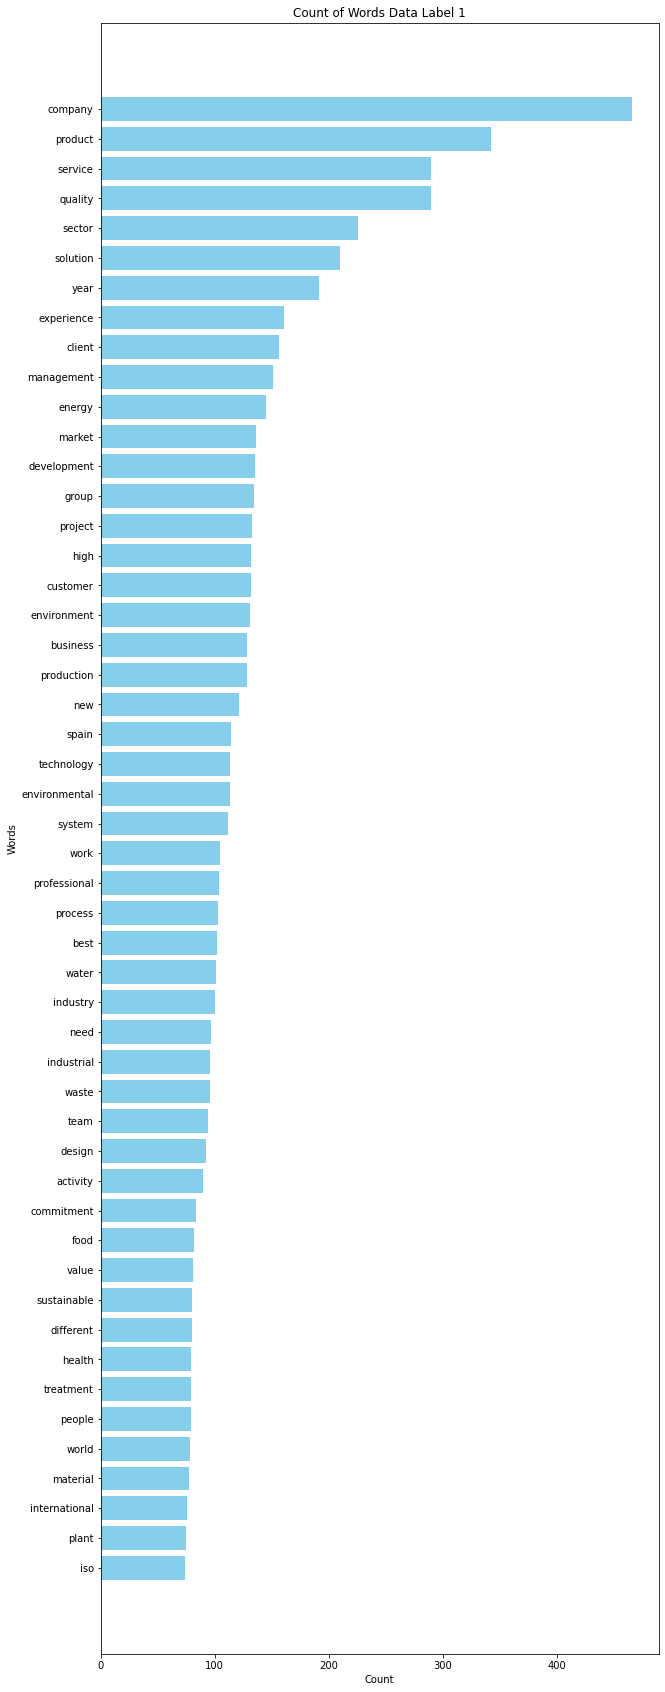

In [35]:
plot_bar_countwords(word_counter_label1, 50,"Data Label 1")

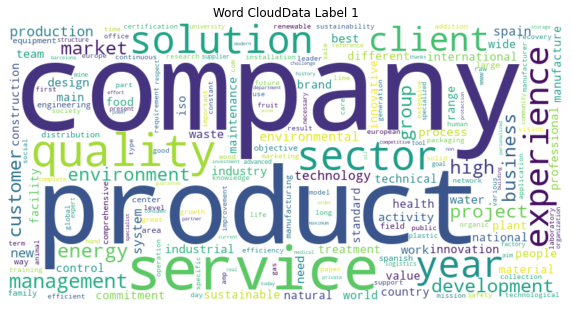

In [38]:
plot_wordcoud(word_counter_label1, "Data Label 1")

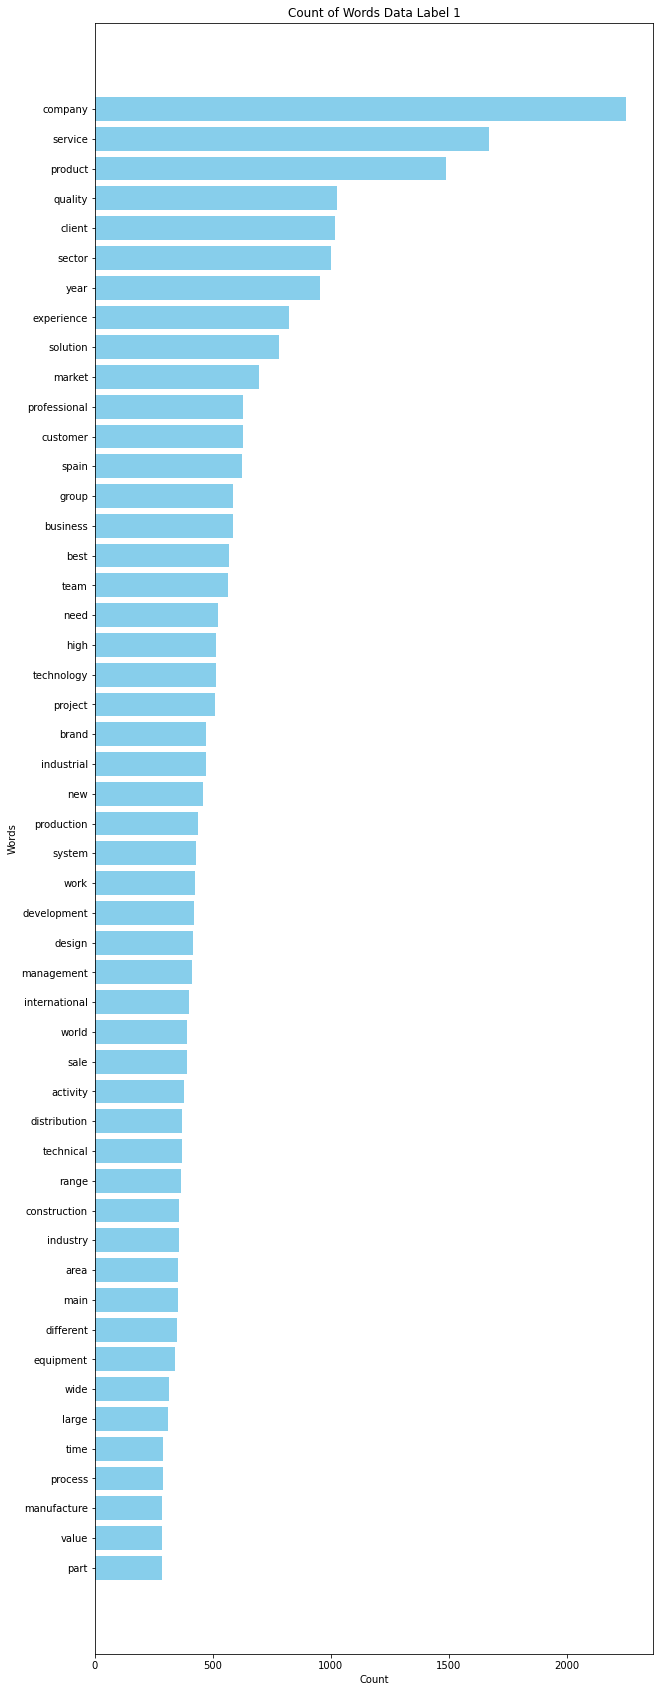

In [39]:
plot_bar_countwords(word_counter_label0, 50,"Data Label 1")

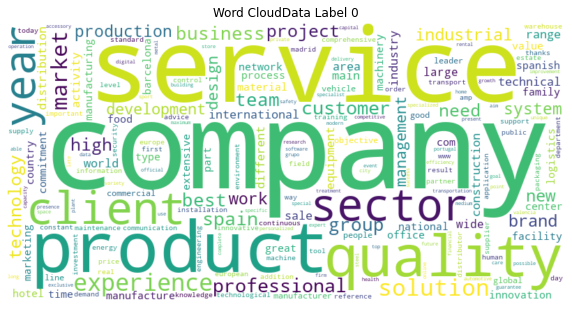

In [40]:
plot_wordcoud(word_counter_label0, "Data Label 0")

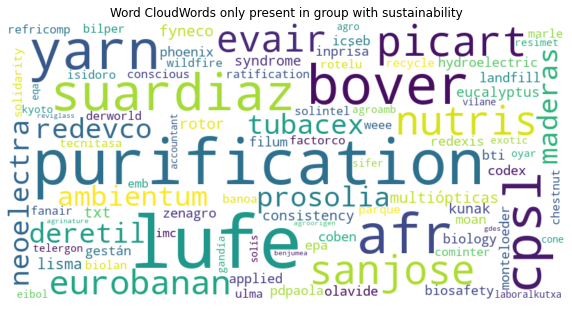

In [41]:
# Lets plot the frequency of the words that are only available in the group with sustainability.

unique_words0 = set(word_counter_label0.keys())
unique_words1 = set(word_counter_label1.keys())

unique_words = unique_words1 - unique_words0 

wordcounter_unique = {word: word_counter_label1[word] for word in unique_words}

plot_wordcoud(wordcounter_unique, "Words only present in group with sustainability")

# Modeling

### First Approach using AutoML (PyCaret)

First I will use PyCaret to test different algorythms.

In [1]:
import pandas as pd
data_model = pd.read_parquet('data_model.parquet')

c:\Users\arrua\anaconda3\envs\challenge_2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\arrua\anaconda3\envs\challenge_2\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\arrua\anaconda3\envs\challenge_2\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data_model.head()

,Label,abc,abetos,ability,able,abrasive,absolute,absorption,acacia,academic,...,zero,zeta,zeulab,zinc,zinkia,zone,zown,álava,ángel,ávila
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from pycaret.classification import tune_model

In [3]:
from pycaret.classification import setup,compare_models, plot_model,create_model,tune_model


model_exp = setup(data = data_model,  target = 'Label',
                    train_size=0.7,
                    use_gpu=False,
                    numeric_features=data_model.columns[1:].tolist(),
                    verbose=False,
                    fix_imbalance=True,
                    data_split_stratify=True,
                    session_id=42)

In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8842,0.8614,0.3569,0.7654,0.4819,0.4275,0.4689,3.1340
ridge,Ridge Classifier,0.8783,0.0000,0.5128,0.6332,0.5644,0.4948,0.4998,1.2990
lightgbm,Light Gradient Boosting Machine,0.8778,0.8652,0.4714,0.6454,0.5429,0.4745,0.4834,4.0000
lr,Logistic Regression,0.8773,0.8629,0.5287,0.6248,0.5712,0.5003,0.5036,4.9900
rf,Random Forest Classifier,0.8763,0.8455,0.3278,0.7288,0.4458,0.3879,0.4299,2.6870
svm,SVM - Linear Kernel,0.8720,0.0000,0.4583,0.6322,0.5243,0.4531,0.4648,1.6500
gbc,Gradient Boosting Classifier,0.8646,0.8280,0.4335,0.5876,0.4965,0.4205,0.4284,6.4600
ada,Ada Boost Classifier,0.8528,0.7907,0.5190,0.5277,0.5208,0.4342,0.4357,3.1930
knn,K Neighbors Classifier,0.8494,0.5740,0.1114,0.5870,0.1852,0.1414,0.2040,1.7880
dummy,Dummy Classifier,0.8459,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6650


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [6]:
# Light Gradient Boosting Machine is the best one that maximizes F1 Score. 
# I will create and then tune the model

model = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8824,0.8654,0.5000,0.6667,0.5714,0.5049,0.5119
1,0.8676,0.8739,0.5000,0.5926,0.5424,0.4657,0.4680
2,0.8824,0.8279,0.5938,0.6333,0.6129,0.5436,0.5440
3,0.8873,0.8984,0.5625,0.6667,0.6102,0.5448,0.5475
4,0.8775,0.8380,0.4839,0.6250,0.5455,0.4760,0.4812
5,0.8725,0.8331,0.5484,0.5862,0.5667,0.4921,0.4924
6,0.9118,0.8512,0.5484,0.8095,0.6538,0.6054,0.6205
7,0.8578,0.8853,0.5161,0.5333,0.5246,0.4410,0.4411
8,0.8818,0.8605,0.4839,0.6522,0.5556,0.4891,0.4963


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
print(tuned_model)

LogisticRegression(C=2.696, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


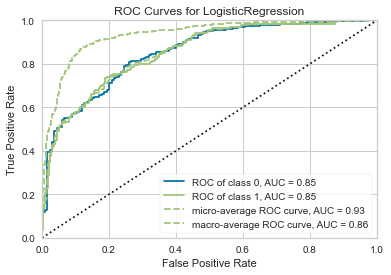

In [11]:
plot_model(tuned_model, plot = 'auc')

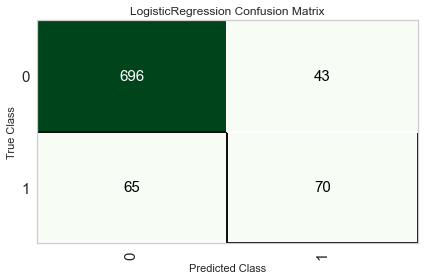

In [13]:
plot_model(tuned_model, plot = 'confusion_matrix')

### Scond approach using manual modeling

In [62]:
from sklearn.metrics import classification_report, roc_curve,confusion_matrix, auc
from sklearn.model_selection import train_test_split , GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [40]:
# Define training ad validation set

X = data_model.drop(['Label'], axis=1)
y = data_model['Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [41]:
# Since data is unbalanced, I will use SMOTE(Synthetic Minority Over-sampling Technique) to create syntechic data in the training set.

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [42]:
# Define the model

# lgb_model = lgb.LGBMClassifier(reg_alpha=0.001, reg_lambda=5)

lr_model = LogisticRegression(class_weight='balanced', dual=False,
                            fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                            max_iter=1000, multi_class='auto', n_jobs=None,
                            random_state=42, tol=0.0001, verbose=0,
                            warm_start=False)

In [43]:
# Parameters to be optimized

param_grid = {'penalty': [ 'l2'],            
            'C': [0.01, 0.1, 1, 2.5, 3],
            }

# I am going to search the best parameters using Grid search with KFold CV

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='f1')

# Training step
best_lr_model = grid_search.fit(X_train_resampled, y_train_resampled)

best_params = best_lr_model.best_params_
print("Best hyperparameters:", best_params)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyperparameters: {'C': 3, 'penalty': 'l2'}


In [44]:
# Get predictions

y_pred = best_lr_model.predict(X_valid)

# Confusion matrix and classification report

conf_matrix = confusion_matrix(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

In [45]:
conf_matrix

array([[695,  44],
       [ 65,  70]], dtype=int64)

In [46]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       739
           1       0.61      0.52      0.56       135

    accuracy                           0.88       874
   macro avg       0.76      0.73      0.74       874
weighted avg       0.87      0.88      0.87       874



### Search the best threshold

In this section I optimize the threshold using the ROC Curve and the Youden Index criteria.

In [63]:
def plot_roc_auc(actual, preds,optimal_tpr,optimal_fpr):
    
    fig,axs=plt.subplots(nrows=1,ncols=2,sharex=False,figsize=(13,8))
    
    fpr, tpr, thresholds = roc_curve(actual, preds)
    roc_auc = auc(fpr, tpr)
    axs[0].plot(fpr, tpr,'r')
    axs[0].plot([0,1],[0,1],'b')
    axs[0].set_title('AUC: {}'.format(roc_auc))
    axs[0].set_xlabel('FPR')
    axs[0].set_ylabel('TPR')
    axs[0].hlines(y=optimal_tpr,color='g',xmin=0,xmax=1,linestyles='dotted')
    axs[0].vlines(x=optimal_fpr,color='g',ymin=0,ymax=1,linestyles='dotted')
    
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
    roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    
    # Plot tpr vs 1-fpr
    axs[1].plot(roc['tpr'])
    axs[1].plot(roc['1-fpr'], color = 'red')
    axs[1].set_xlabel('1-FPR')
    axs[1].set_ylabel('TPR')
    axs[1].set_title('Receiver operating characteristic')
    axs[1].set_xticklabels([])
    plt.show()

In [64]:
def find_roc_cutoff_point(target, predicted):
    
    """ Finds cutoff point using Youden Index
    
    https://es.wikipedia.org/wiki/%C3%8Dndice_de_Youden
    ----------
    target : y_test

    predicted : predicciones

    Returns
    -------     
    cut-off value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tpr': pd.Series(tpr),
                        'fpr' : pd.Series(fpr),
                        'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t=roc.iloc[(roc.tf-0).abs().argsort()][:1]

    return list(roc_t['threshold']),roc

In [65]:
threshold,roc_df=find_roc_cutoff_point(y_valid, best_lr_model.predict_proba(X_valid)[:, 1])
print("The optimal threshold is : {:.6f}".format(threshold[0]))

The optimal threshold is : 0.233579


In [66]:
roc_df[roc_df.threshold==threshold[0]]

,tpr,fpr,tf,threshold
103,0.762963,0.239513,0.002476,0.233579


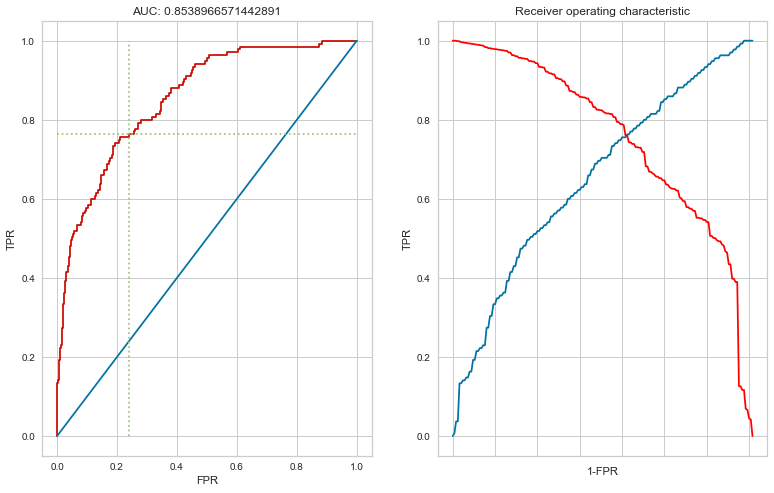

In [68]:
plot_roc_auc(y_valid,  best_lr_model.predict_proba(X_valid)[:, 1] ,0.762963,0.239513)

In [69]:
X_test_predictions=X_valid.reset_index(drop=True)
X_test_predictions['predictions_probs']=best_lr_model.predict_proba(X_test_predictions)[:, 1]
X_test_predictions.head()

,abc,abetos,ability,able,abrasive,absolute,absorption,acacia,academic,acb,...,zeta,zeulab,zinc,zinkia,zone,zown,álava,ángel,ávila,predictions_probs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028991
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195143
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282910
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207620
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298105


In [70]:
X_test_predictions['pred_label'] = X_test_predictions['predictions_probs'].apply(lambda x: 1 if x>threshold[0] else 0 )
X_test_predictions.head()

,abc,abetos,ability,able,abrasive,absolute,absorption,acacia,academic,acb,...,zeulab,zinc,zinkia,zone,zown,álava,ángel,ávila,predictions_probs,pred_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028991,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195143,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282910,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207620,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298105,1


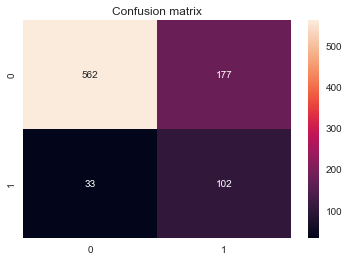

In [71]:
cm=confusion_matrix(y_valid,X_test_predictions.pred_label)

sns.heatmap(cm, annot=True, fmt='d')

plt.title("Confusion matrix")   
plt.show()

In [72]:
print(classification_report(y_valid,X_test_predictions.pred_label))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       739
           1       0.37      0.76      0.49       135

    accuracy                           0.76       874
   macro avg       0.66      0.76      0.67       874
weighted avg       0.86      0.76      0.79       874



In [270]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

Save Model and Vectorizer

In [50]:
import gzip, pickle
with gzip.open('vectorizer.pklz', 'wb') as ofp:
    pickle.dump(vectorizer, ofp)

In [79]:
import gzip, pickle
with gzip.open('MODEL20240416.pklz', 'wb') as ofp:
    pickle.dump(best_lr_model, ofp)